In [23]:
import pandas as pd
import random
import math
from matplotlib.pyplot import *

import scipy
import scipy.signal

import numpy

In [18]:
data = pd.read_csv("result_per_hour.csv", delimiter =',')
data

,time_slots,ASSE,OL,Clermont Foot,MHSC,OM,OGCN,ASM,ESTAC,FCGB,...,SdR,FCM,RCS,Angers SCO,FCN,Stade Rennais,RCL,LOSC,FCL,SB
0,2022-01-24T17:00:00.000Z,19,49,0,13,61,5,10,0,5,...,1,3,0,0,14,0,2,24,3,25
1,2022-01-24T18:00:00.000Z,31,69,0,8,66,3,8,1,3,...,2,3,1,0,5,0,2,21,0,37
2,2022-01-24T19:00:00.000Z,18,51,0,18,58,0,1,15,7,...,6,4,1,0,2,0,0,7,1,59
3,2022-01-24T20:00:00.000Z,17,63,0,8,40,3,4,8,4,...,8,3,0,0,5,0,0,11,4,33
4,2022-01-24T21:00:00.000Z,11,52,0,3,48,2,4,4,1,...,1,5,1,0,6,0,1,17,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2022-02-06T07:00:00.000Z,33,82,1,0,46,9,0,1,0,...,19,1,3,0,1,2,13,5,3,2
303,2022-02-06T08:00:00.000Z,55,93,1,0,49,20,0,1,5,...,15,2,2,0,2,4,33,16,18,4
304,2022-02-06T09:00:00.000Z,64,77,1,0,44,22,0,1,9,...,8,4,16,3,12,1,10,21,6,6
305,2022-02-06T10:00:00.000Z,89,95,0,0,55,22,0,2,4,...,5,3,4,0,6,9,16,27,3,2


In [21]:
b = data.iloc[:, 0] #reading from column 0
a = pd.to_datetime(b, format='%Y-%m-%dT%H:%M:%S.%fZ', errors='ignore')
data['time'] = a

In [60]:
def plot_df(x, y, xlabel='Date', ylabel='Value', dpi=100):
    figure(figsize=(16,5), dpi=dpi)
    plot(x, y)
    gca().set(xlabel=xlabel, ylabel=ylabel)

<AxesSubplot:xlabel='time'>

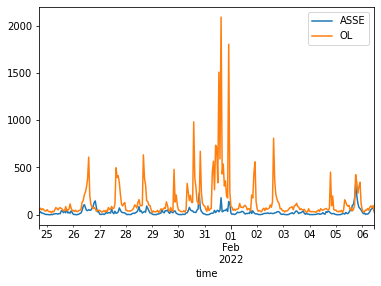

In [63]:
data.plot(x = 'time', y = ['ASSE', 'OL'])

In [69]:
list_clubs = list(data.columns[1:-1]) 
list_clubs

['ASSE',
 'OL',
 'Clermont Foot',
 'MHSC',
 'OM',
 'OGCN',
 'ASM',
 'ESTAC',
 'FCGB',
 'PSG',
 'SdR',
 'FCM',
 'RCS',
 'Angers SCO',
 'FCN',
 'Stade Rennais',
 'RCL',
 'LOSC',
 'FCL',
 'SB']

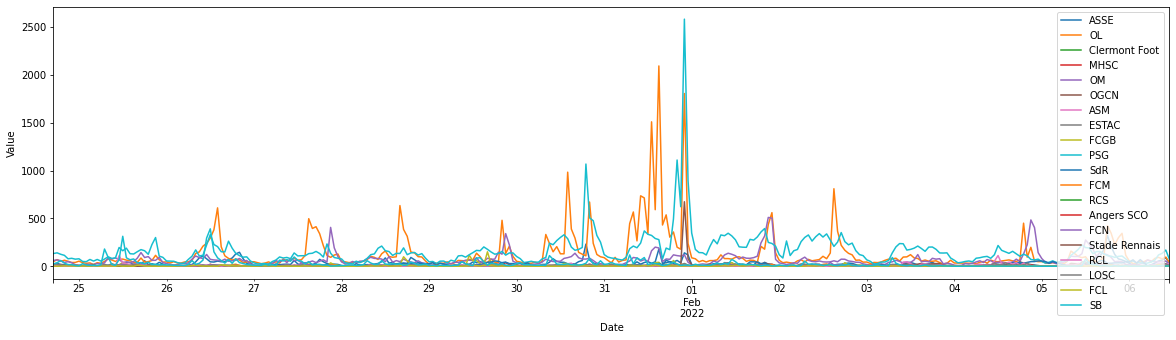

In [78]:
data.plot(x = 'time', y = list_clubs, xlabel='Date', ylabel='Value', figsize=(20,5))
show()

In [95]:
data['ASSE'].shape

(307,)

In [94]:
data['ASSE'][0:data.shape[0]]

0      19
1      31
2      18
3      17
4      11
       ..
302    33
303    55
304    64
305    89
306    30
Name: ASSE, Length: 307, dtype: int64

In [96]:
moyenne_per_club = []
for club in list_clubs:
    moyenne = sum(data[club])/data[club].shape[0]
    moyenne_per_club.append(moyenne)

moyenne_per_club

[27.690553745928337,
 137.0097719869707,
 0.12052117263843648,
 3.1237785016286646,
 67.70684039087948,
 7.47557003257329,
 5.192182410423452,
 1.49185667752443,
 7.058631921824104,
 162.35830618892507,
 12.609120521172638,
 4.234527687296417,
 1.260586319218241,
 0.7850162866449512,
 4.609120521172638,
 1.1042345276872965,
 5.260586319218241,
 8.635179153094462,
 2.3485342019543975,
 24.241042345276874]

In [101]:
dict_moy_per_club = dict(zip(list_clubs, moyenne_per_club))
dict_moy_per_club

{'ASSE': 27.690553745928337,
 'OL': 137.0097719869707,
 'Clermont Foot': 0.12052117263843648,
 'MHSC': 3.1237785016286646,
 'OM': 67.70684039087948,
 'OGCN': 7.47557003257329,
 'ASM': 5.192182410423452,
 'ESTAC': 1.49185667752443,
 'FCGB': 7.058631921824104,
 'PSG': 162.35830618892507,
 'SdR': 12.609120521172638,
 'FCM': 4.234527687296417,
 'RCS': 1.260586319218241,
 'Angers SCO': 0.7850162866449512,
 'FCN': 4.609120521172638,
 'Stade Rennais': 1.1042345276872965,
 'RCL': 5.260586319218241,
 'LOSC': 8.635179153094462,
 'FCL': 2.3485342019543975,
 'SB': 24.241042345276874}

In [104]:
data['ASSE'][23]
data['ASSE'][23].index

AttributeError: 'numpy.int64' object has no attribute 'index'

In [110]:
over_tweets = []
for club in list_clubs:
    for i in range(0, data[club].shape[0]):
        tweets_number = data[club][i]
        if tweets_number > dict_moy_per_club[club]* 6 :
            information = [club, data['time'][i], tweets_number]
            over_tweets.append(information)
print(len(over_tweets))
over_tweets

117


[['ASSE', Timestamp('2022-01-30 19:00:00'), 231],
 ['ASSE', Timestamp('2022-01-31 15:00:00'), 180],
 ['ASSE', Timestamp('2022-02-05 17:00:00'), 172],
 ['ASSE', Timestamp('2022-02-05 18:00:00'), 323],
 ['ASSE', Timestamp('2022-02-05 19:00:00'), 207],
 ['OL', Timestamp('2022-01-30 14:00:00'), 983],
 ['OL', Timestamp('2022-01-31 13:00:00'), 1509],
 ['OL', Timestamp('2022-01-31 15:00:00'), 2093],
 ['OL', Timestamp('2022-01-31 22:00:00'), 1805],
 ['Clermont Foot', Timestamp('2022-02-03 10:00:00'), 2],
 ['Clermont Foot', Timestamp('2022-02-03 12:00:00'), 3],
 ['Clermont Foot', Timestamp('2022-02-03 16:00:00'), 2],
 ['Clermont Foot', Timestamp('2022-02-03 17:00:00'), 1],
 ['Clermont Foot', Timestamp('2022-02-03 18:00:00'), 1],
 ['Clermont Foot', Timestamp('2022-02-04 03:00:00'), 1],
 ['Clermont Foot', Timestamp('2022-02-04 10:00:00'), 3],
 ['Clermont Foot', Timestamp('2022-02-04 15:00:00'), 2],
 ['Clermont Foot', Timestamp('2022-02-04 16:00:00'), 1],
 ['Clermont Foot', Timestamp('2022-02-04 2

In [ ]:
over_tweets = []
for club in list_clubs:
    for i in range(0, data[club].shape[0]):
        tweets_number = data[club][i]
        if tweets_number > dict_moy_per_club[club]* 6 :
            information = [club, data['time'][i], tweets_number]
            over_tweets.append(information)
print(len(over_tweets))
over_tweets

117


[['ASSE', Timestamp('2022-01-30 19:00:00'), 231],
 ['ASSE', Timestamp('2022-01-31 15:00:00'), 180],
 ['ASSE', Timestamp('2022-02-05 17:00:00'), 172],
 ['ASSE', Timestamp('2022-02-05 18:00:00'), 323],
 ['ASSE', Timestamp('2022-02-05 19:00:00'), 207],
 ['OL', Timestamp('2022-01-30 14:00:00'), 983],
 ['OL', Timestamp('2022-01-31 13:00:00'), 1509],
 ['OL', Timestamp('2022-01-31 15:00:00'), 2093],
 ['OL', Timestamp('2022-01-31 22:00:00'), 1805],
 ['Clermont Foot', Timestamp('2022-02-03 10:00:00'), 2],
 ['Clermont Foot', Timestamp('2022-02-03 12:00:00'), 3],
 ['Clermont Foot', Timestamp('2022-02-03 16:00:00'), 2],
 ['Clermont Foot', Timestamp('2022-02-03 17:00:00'), 1],
 ['Clermont Foot', Timestamp('2022-02-03 18:00:00'), 1],
 ['Clermont Foot', Timestamp('2022-02-04 03:00:00'), 1],
 ['Clermont Foot', Timestamp('2022-02-04 10:00:00'), 3],
 ['Clermont Foot', Timestamp('2022-02-04 15:00:00'), 2],
 ['Clermont Foot', Timestamp('2022-02-04 16:00:00'), 1],
 ['Clermont Foot', Timestamp('2022-02-04 2